# Notebook for Nonesuch Shale pmag thermal demagnetization analyses

This Python notebook is for analyzing and visualizng thermal demagnetization data of paleomagnetic samples collected from the Nonesuch Shale. 

A total of four components are identified and are named as the following:
- a lt component: low temperature component, oftenly corresponds to the present day local field direction in geographic coordinates
    - this might be associated with component 4 (low coercivity component about <50 mT) from rock mag unmix result
- a mt component: magnetite temperature component, oftenly fitted in a small unblocking temperature window between 500 and 580, interpreted to be the remanence carried by dertital magnetite and hold a remanence similar to the high temperature component hdt of detrital hematite 
- a hdt component: hematite detrital remanence component, oftenly fitted in a small range of unblocking temperature steps from 600 to 680 that have a similar direction to the mt component
- a hct component: hematite chemical remanence component, oftenly fitted in a wide range of unblocking temperature steps from 300 to 600 that display distinct direction than the mt and hdt components
    - this might be associated with component 2 (high coercivity component aboue >500 mT) from rock mag unmix result

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
mpl.rc('pdf',fonttype = 42)

## Load Potato River Falls demag data

In [41]:
Nonesuch_demag_site = pd.read_csv('../Data/Thermal_PF18/sites.txt', sep='\t', header=1)
Nonesuch_demag_sample = pd.read_csv('../Data/Thermal_PF18/samples.txt', sep='\t', header=1)
Nonesuch_demag_specimen = pd.read_csv('../Data/Thermal_PF18/specimens.txt', sep='\t', header=1)
Nonesuch_demag_specimen['lon'] = -90.5
Nonesuch_demag_specimen['lat'] = 46.5
Nonesuch_demag_specimen = ipmag.vgp_calc(Nonesuch_demag_specimen, tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)

Nonesuch_demag_sample.head()

,sample,site,height,geologic_classes,geologic_types,lithologies,analysts,azimuth,azimuth_dec_correction,bed_dip,bed_dip_direction,dip,citations,method_codes
0,PF18-1,PF18,105.90,NaN,NaN,NaN,NaN,33.6,0,81.4,311.5,-29,This study,SO-CMD-NORTH
1,PF18-2,PF18,105.78,NaN,NaN,NaN,NaN,83.6,0,81.4,311.5,-12,This study,SO-CMD-NORTH
2,PF18-3,PF18,105.65,NaN,NaN,NaN,NaN,-13.4,0,81.4,311.5,-12,This study,SO-CMD-NORTH
3,PF18-4,PF18,105.62,NaN,NaN,NaN,NaN,-22.4,0,81.4,311.5,-12,This study,SO-CMD-NORTH
4,PF18-5,PF18,105.40,NaN,NaN,NaN,NaN,176.6,0,81.4,311.5,-17,This study,SO-CMD-NORTH


99    81.9
Name: bed_dip, dtype: float64

## plot all components

In [4]:
Nonesuch_demag_site_lt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'lt') & (Nonesuch_demag_site['dir_tilt_correction'] == 0)]
Nonesuch_demag_site_mt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'mt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hct = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hct') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_hdt = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'hdt') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]
Nonesuch_demag_site_mht = Nonesuch_demag_site[(Nonesuch_demag_site['dir_comp_name'] == 'mht') & (Nonesuch_demag_site['dir_tilt_correction'] == 100)]

Nonesuch_demag_specimen_lt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'lt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]
Nonesuch_demag_specimen_mt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hct = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hct') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_hdt = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hdt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]
Nonesuch_demag_specimen_mht = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mht') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 100)]

In [5]:
lt_color_light = 'limegreen'
lt_color_dark = 'darkgreen'
mt_color_light = '#99BFCC'
mt_color_dark = '#0000FC'
mht_color_light = '#FFD580'
mht_color_dark = 'orange'
hdt_color_light = '#CCB4CD'
hdt_color_dark = '#9E1EED'
hct_color_light = '#FFCCCC'
hct_color_dark = '#FA5F5F'

### low temp remanence

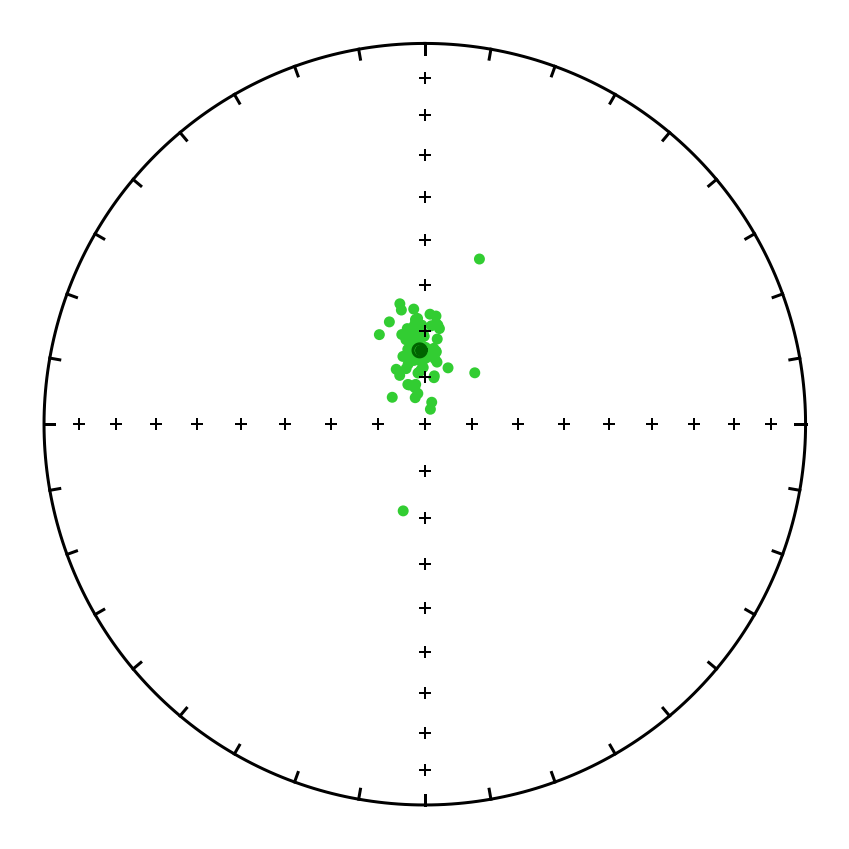

In [6]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_lt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_lt['dir_inc'].tolist(), color = lt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_lt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_lt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = lt_color_dark)

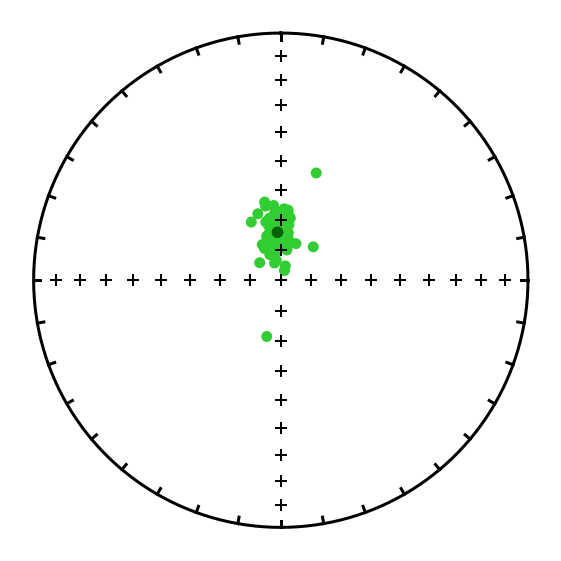

In [7]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_lt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_lt['dir_inc'].tolist(), color = lt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_lt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_lt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
                   color = lt_color_dark)
plt.savefig('./code_output/directions_lt.pdf')

### magnetite remanence

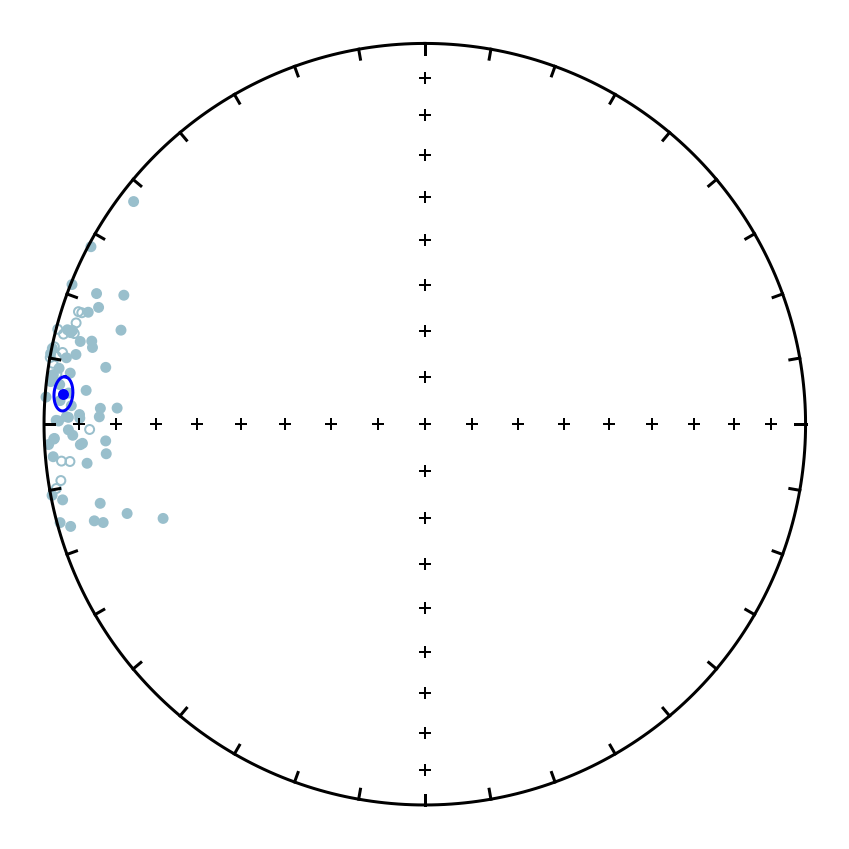

In [8]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mt['dir_inc'].tolist(), color = mt_color_light)

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)

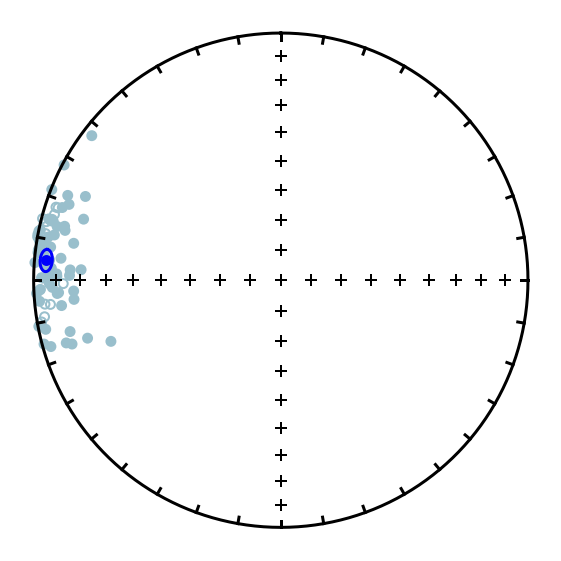

In [9]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mt['dir_inc'].tolist(), color = mt_color_light)

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)
plt.savefig('./code_output/directions_mt.pdf')

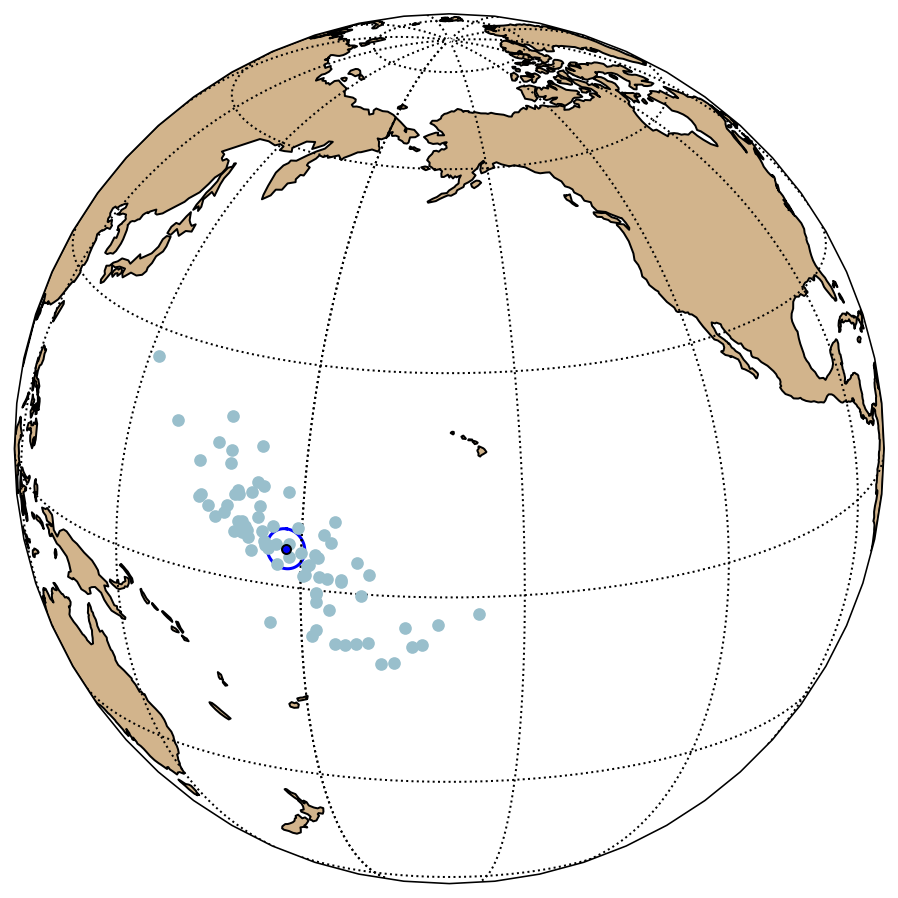

In [10]:
mt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(mt_axis, Nonesuch_demag_specimen_mt['vgp_lon'], Nonesuch_demag_specimen_mt['vgp_lat'], 
               markersize = 40, color = mt_color_light, edge = 'none')
ipmag.plot_pole(mt_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark)

### hematite chemical remanence

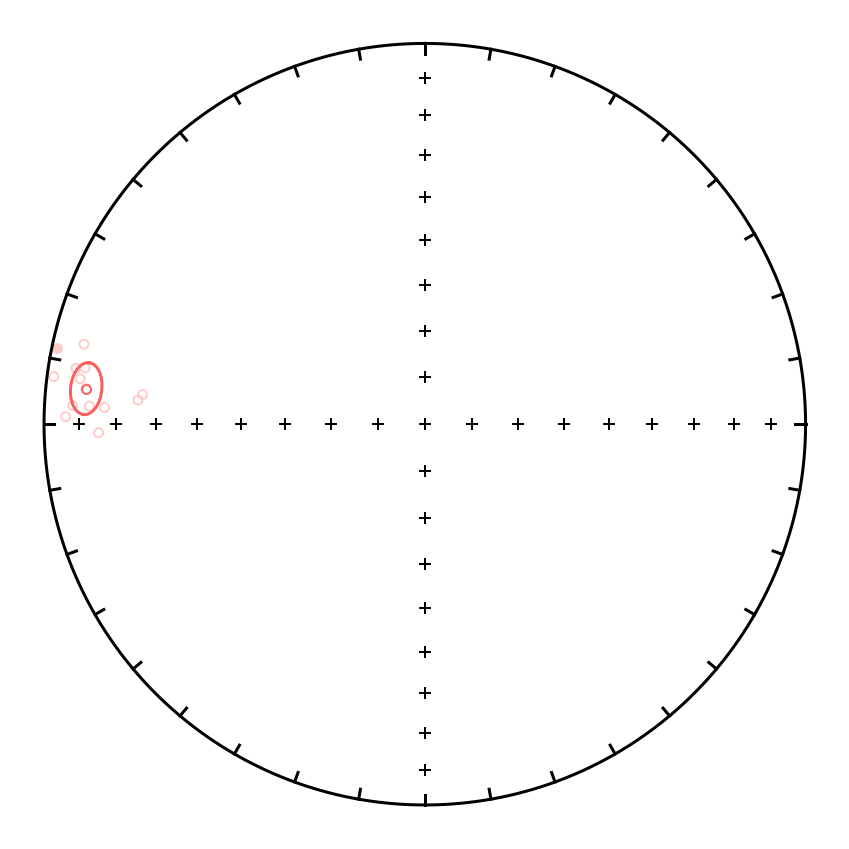

In [11]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hct['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hct['dir_inc'].tolist(), 
              color = hct_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)

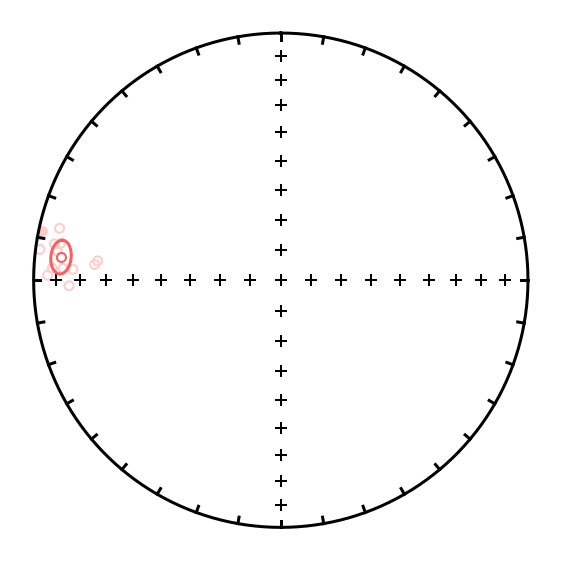

In [12]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hct['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hct['dir_inc'].tolist(), 
              color = hct_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)
plt.savefig('./code_output/directions_hct.pdf')

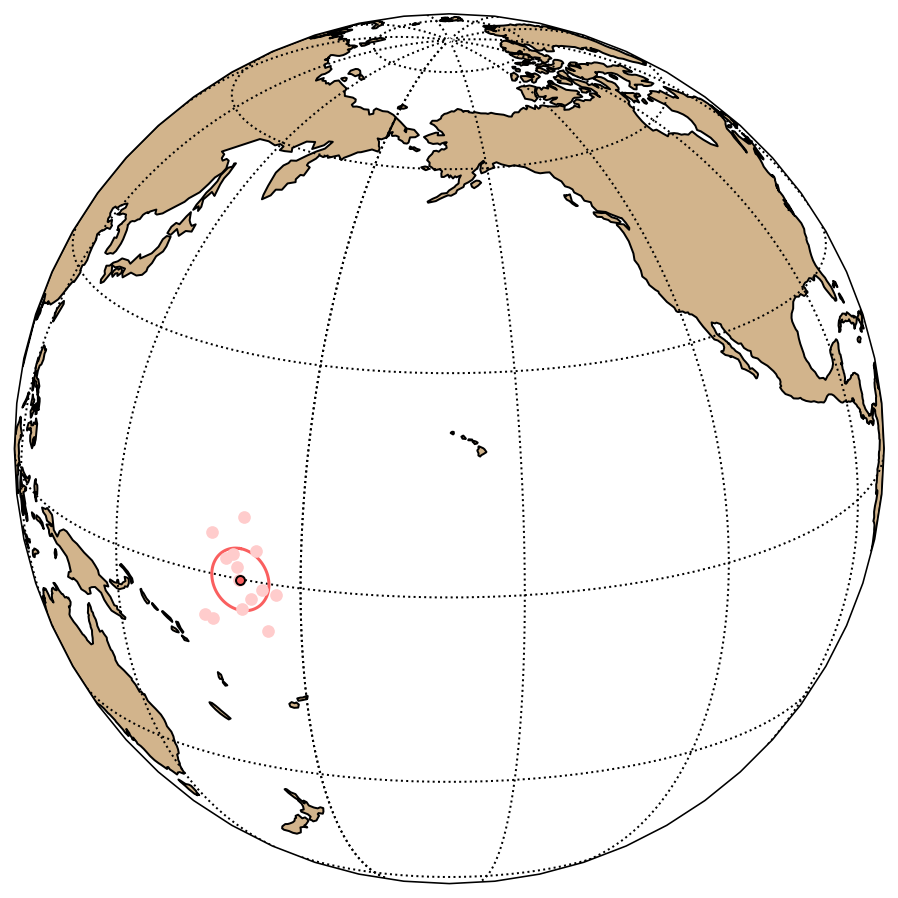

In [13]:
hct_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hct_axis, Nonesuch_demag_specimen_hct['vgp_lon'], Nonesuch_demag_specimen_hct['vgp_lat'], 
               markersize = 40, color = hct_color_light, edge = 'none')
ipmag.plot_pole(hct_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark)

In [14]:
Nonesuch_demag_site_hct['vgp_lon'].iloc[0], Nonesuch_demag_site_hct['vgp_lat'].iloc[0], Nonesuch_demag_site_hct['dir_alpha95'].iloc[0]

(171.2, -0.1, 4.3)

### mht remanence (maghemite?)

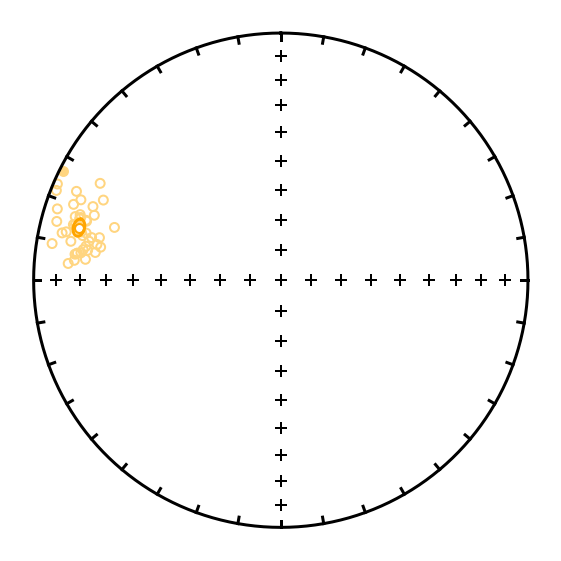

In [15]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_mht['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_mht['dir_inc'].tolist(), 
              color = mht_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_mht['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mht['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = mht_color_dark)
plt.savefig('./code_output/directions_mht.pdf')

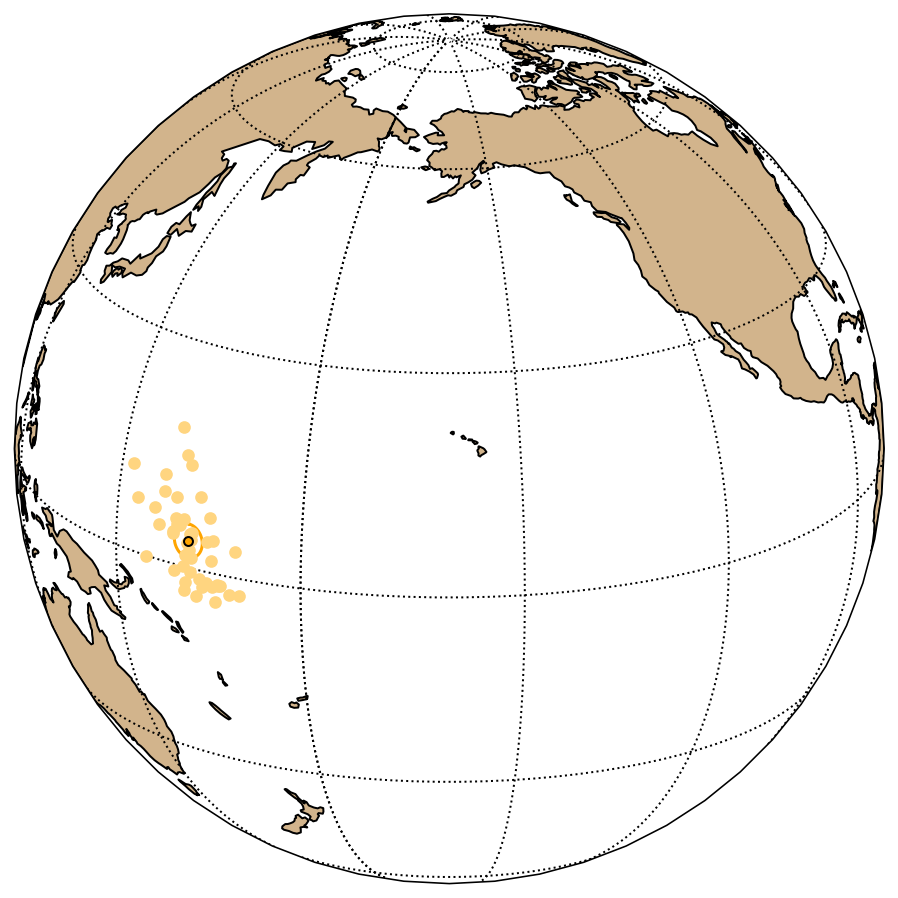

In [16]:
mht_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(mht_axis, Nonesuch_demag_specimen_mht['vgp_lon'], Nonesuch_demag_specimen_mht['vgp_lat'], 
               markersize = 40, color = mht_color_light, edge = 'none')
ipmag.plot_pole(mht_axis, plon=Nonesuch_demag_site_mht['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_mht['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = mht_color_dark)

### hematite detrital remanence

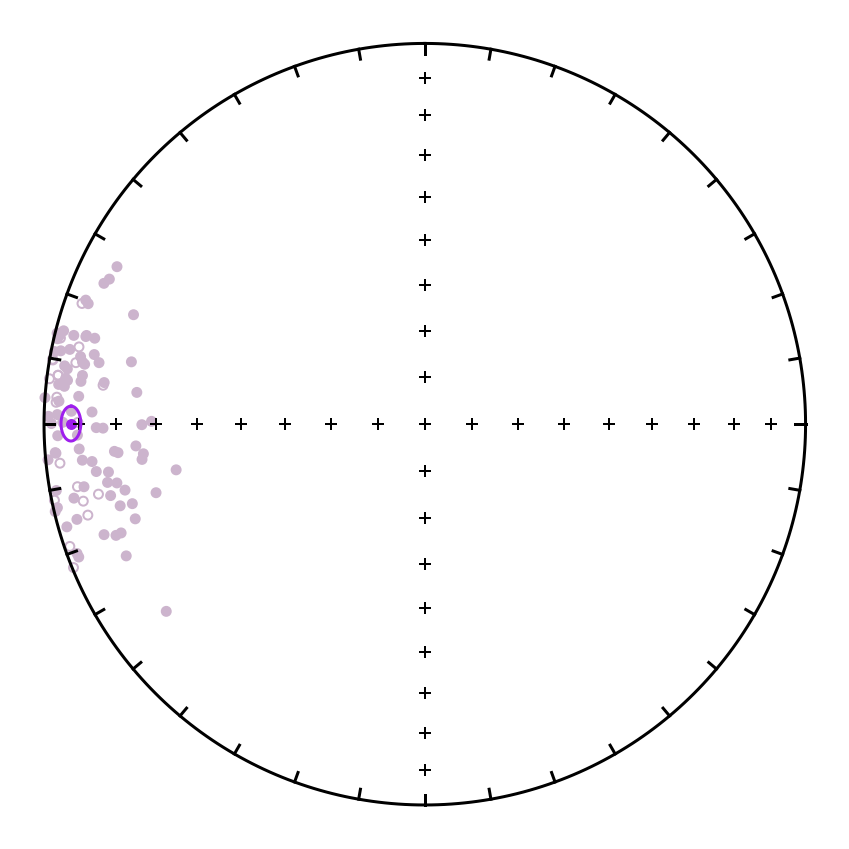

In [17]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 
              color = hdt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)

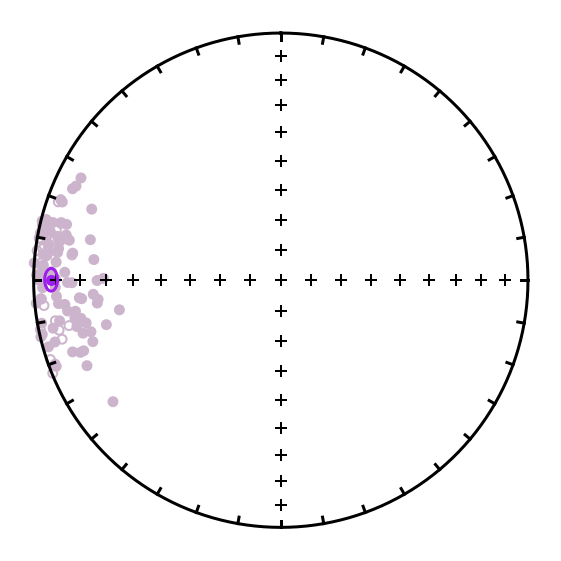

In [18]:
plt.figure(figsize = (4,4))
ipmag.plot_net()

ipmag.plot_di(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(), inc=Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 
              color = hdt_color_light)
ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)
plt.savefig('./code_output/directions_hdt.pdf')

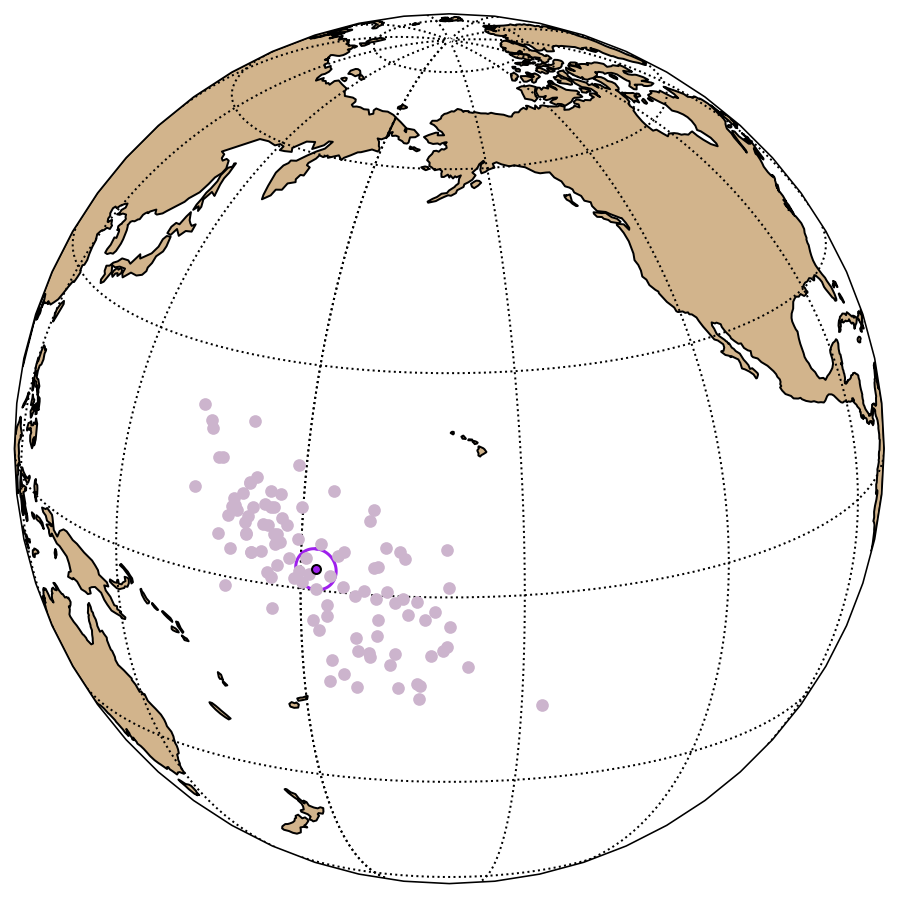

In [19]:
hdt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hdt_axis, Nonesuch_demag_specimen_hdt['vgp_lon'], Nonesuch_demag_specimen_hdt['vgp_lat'], 
               markersize = 40, color = hdt_color_light, edge = 'none')
ipmag.plot_pole(hdt_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark)


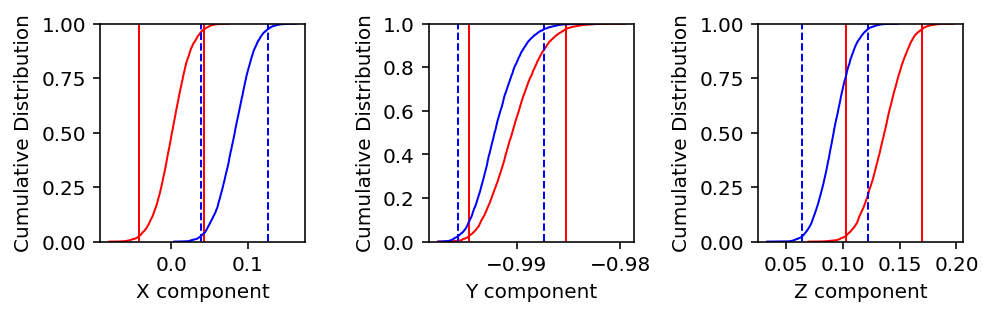

In [20]:
Nonesuch_hdt_directions= ipmag.make_di_block(Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),
                                             Nonesuch_demag_specimen_hdt['dir_inc'].tolist())

Nonesuch_mt_directions= ipmag.make_di_block(Nonesuch_demag_specimen_mt['dir_dec'].tolist(),
                                             Nonesuch_demag_specimen_mt['dir_inc'].tolist())

ipmag.common_mean_bootstrap(Nonesuch_hdt_directions,Nonesuch_mt_directions)

Bootstrapping.... be patient

The original inclination was: 7.78

The corrected inclination is: 15.22
with bootstrapped confidence bounds of: 10.96 to 19.69
and elongation parameter of: 2.61
The flattening factor is: 0.46
with bootstrapped confidence bounds of: 0.71 to 0.38


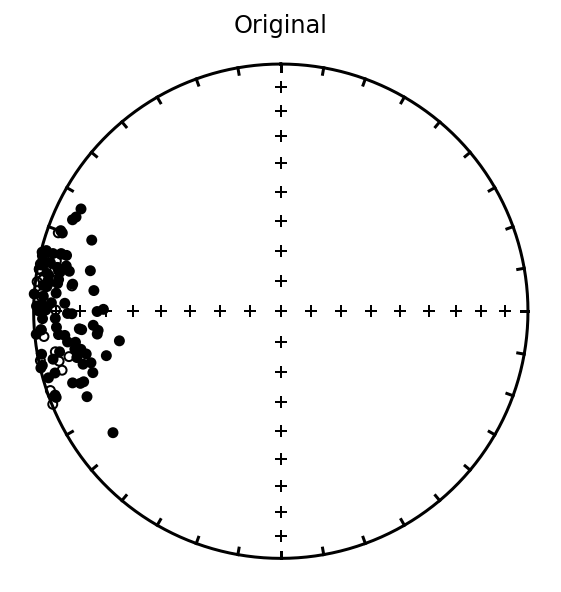

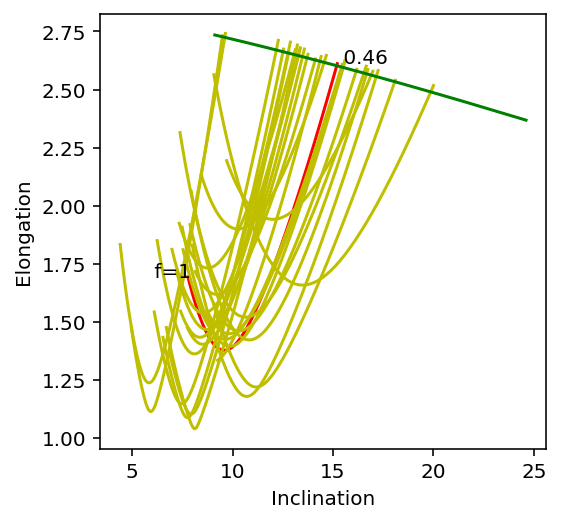

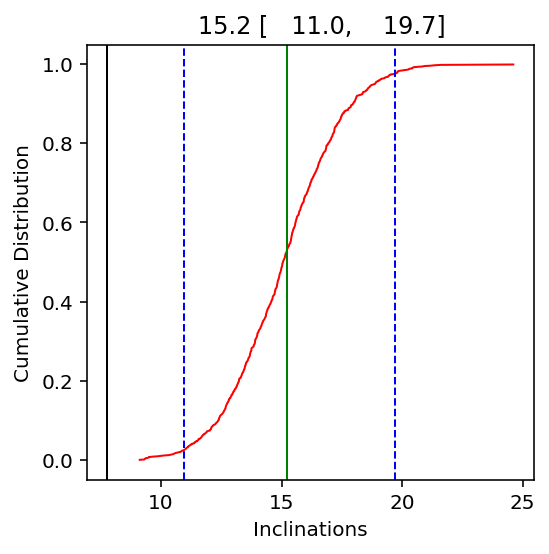

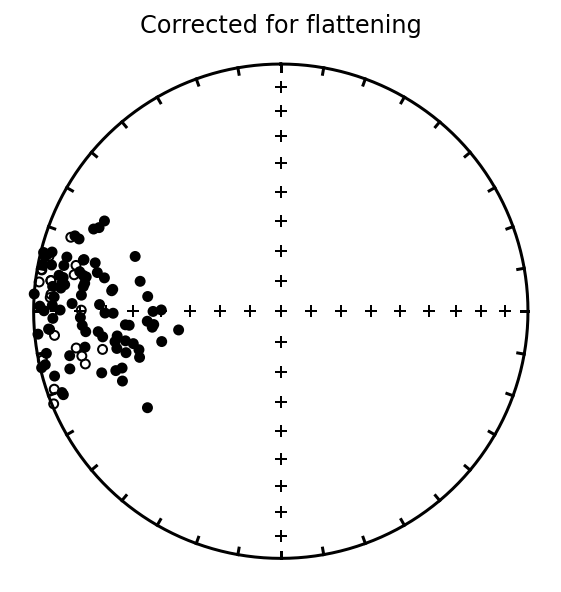

In [21]:
ipmag.find_ei(Nonesuch_hdt_directions)

Bootstrapping.... be patient

The original inclination was: 5.2

The corrected inclination is: 12.41
with bootstrapped confidence bounds of: 8.13 to 16.84
and elongation parameter of: 2.7
The flattening factor is: 0.38
with bootstrapped confidence bounds of: 0.64 to 0.3


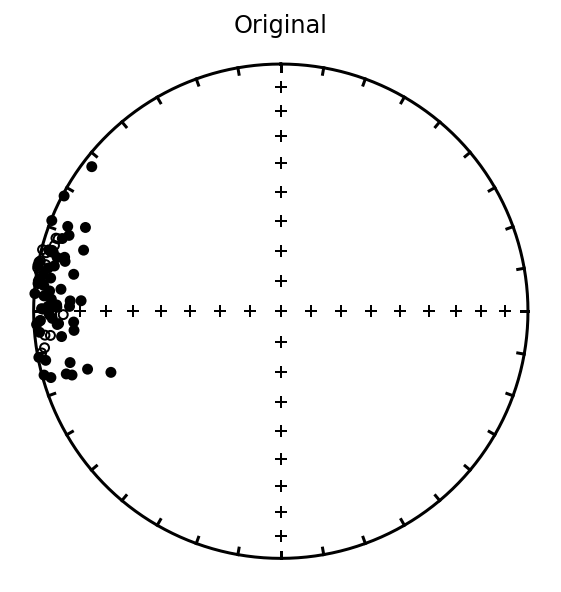

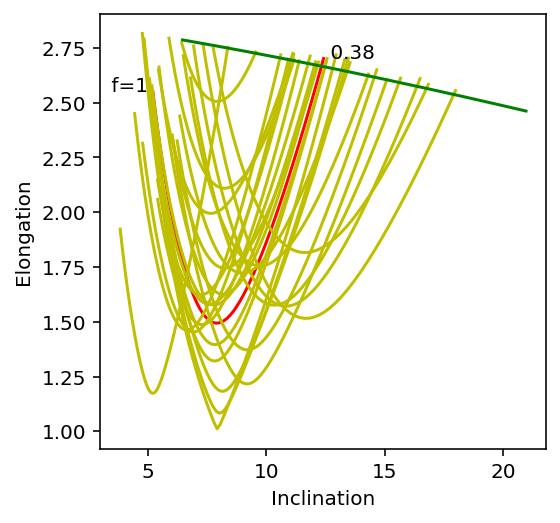

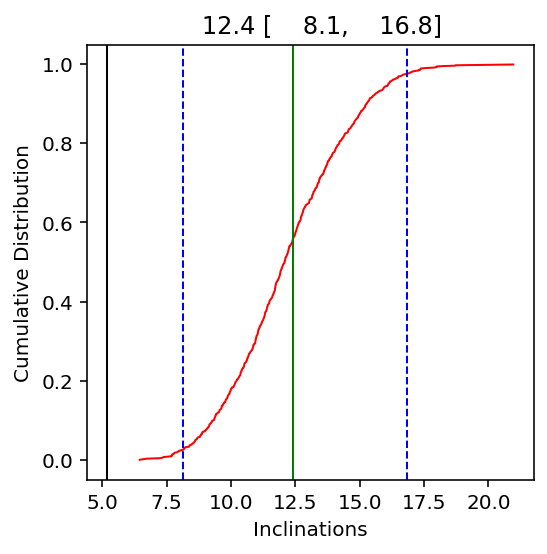

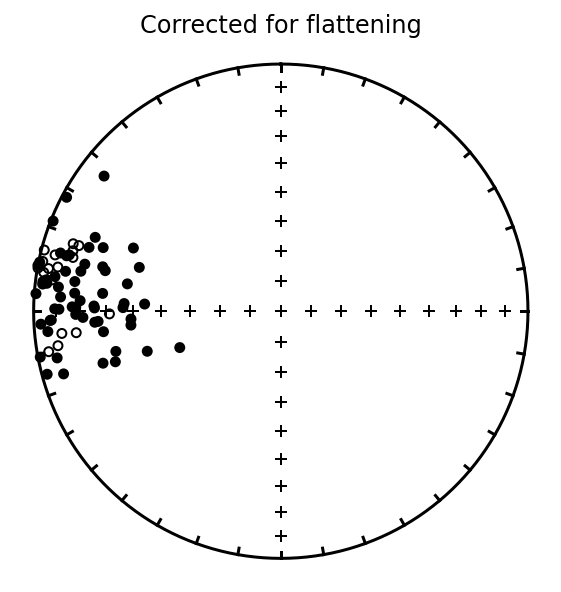

In [22]:
ipmag.find_ei(Nonesuch_mt_directions)

Bootstrapping.... be patient

The original inclination was: 6.67

The corrected inclination is: 13.97
with bootstrapped confidence bounds of: 10.99 to 17.01
and elongation parameter of: 2.65
The flattening factor is: 0.43
with bootstrapped confidence bounds of: 0.6 to 0.38


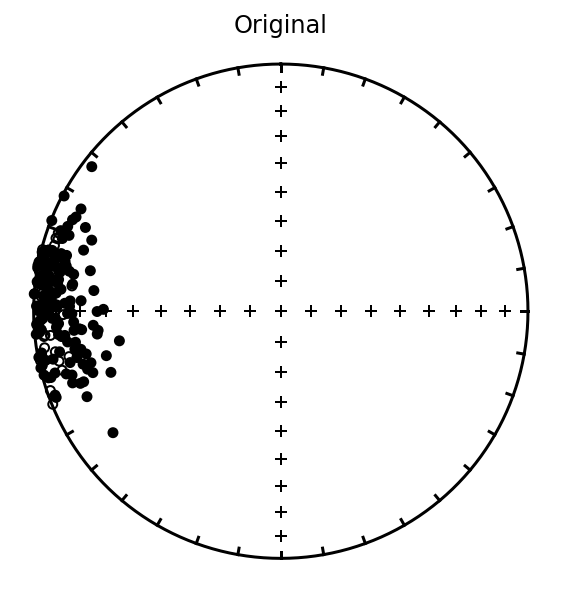

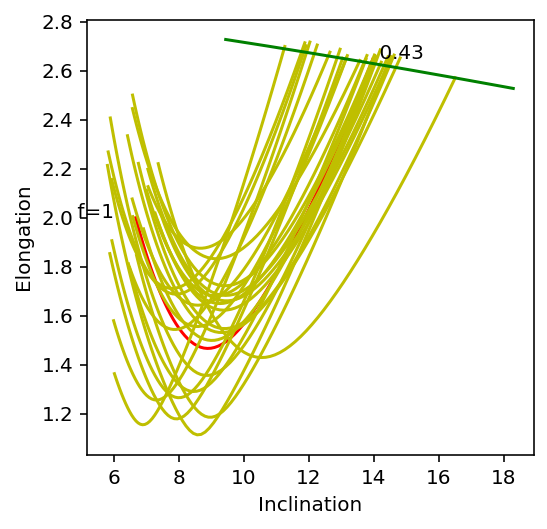

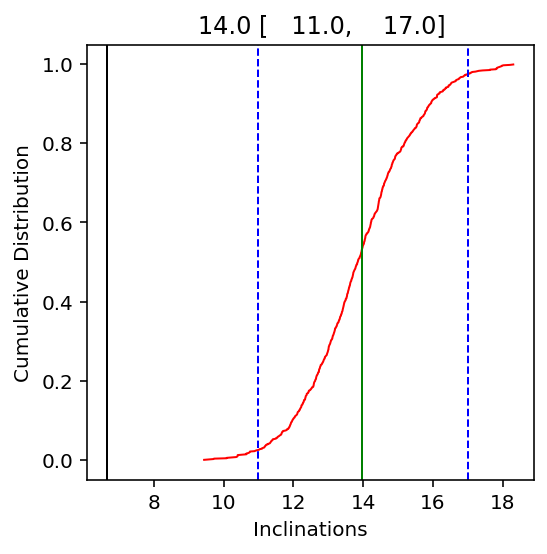

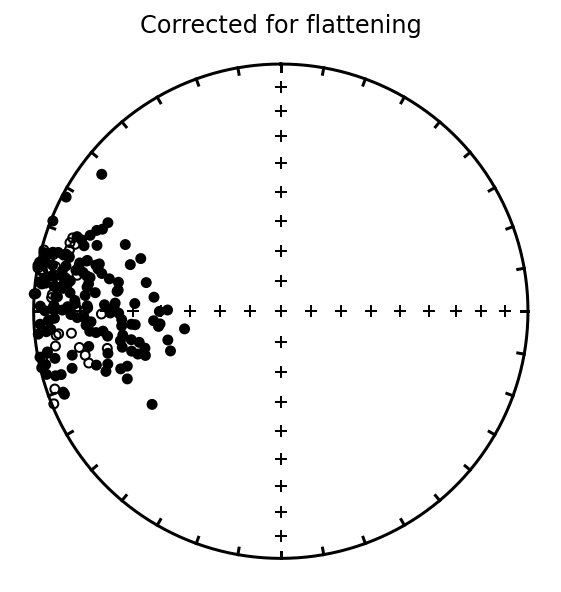

In [23]:
ipmag.find_ei(Nonesuch_hdt_directions+Nonesuch_mt_directions)

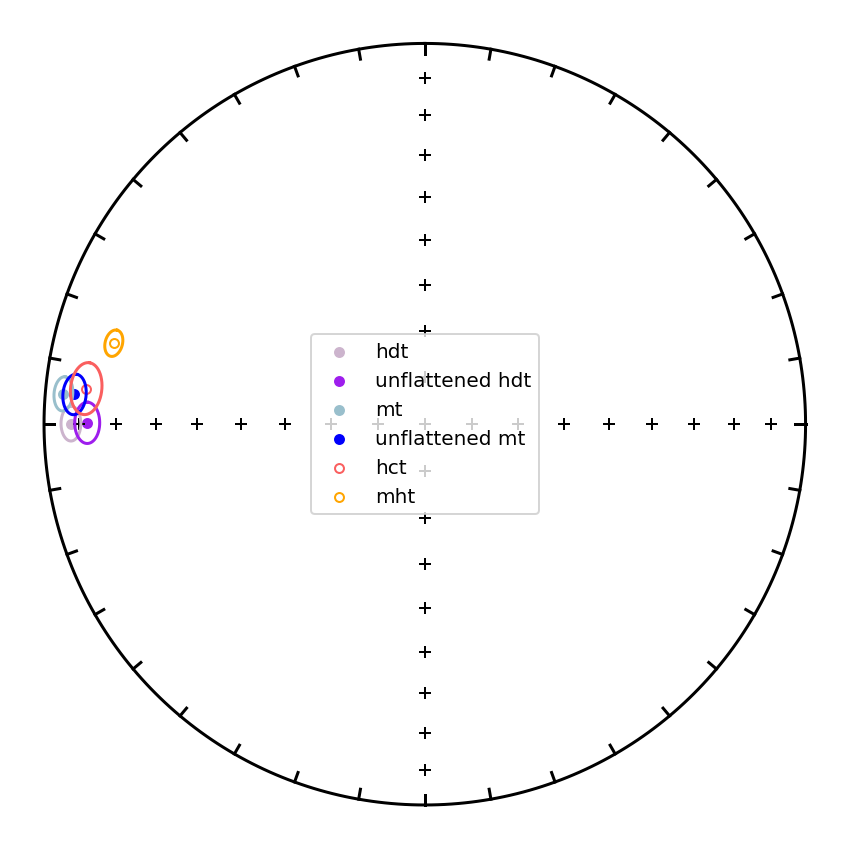

In [24]:
hdt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), 0.6)
hdt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),inc=hdt_unsquished_incs)

mt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_mt['dir_inc'].tolist(), 0.6)
mt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(),inc=mt_unsquished_incs)

plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di_mean(dec=Nonesuch_demag_site_hdt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hdt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_light,label='hdt')

ipmag.plot_di_mean(dec=hdt_unsquished_mean['dec'], 
                   inc=hdt_unsquished_mean['inc'], 
                   a95=hdt_unsquished_mean['alpha95'], 
                   color = hdt_color_dark,label='unflattened hdt')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mt['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mt['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_light,label='mt')

ipmag.plot_di_mean(dec=mt_unsquished_mean['dec'], 
                   inc=mt_unsquished_mean['inc'], 
                   a95=mt_unsquished_mean['alpha95'], 
                   color = mt_color_dark,label='unflattened mt')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_hct['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_hct['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark,label='hct')

ipmag.plot_di_mean(dec=Nonesuch_demag_site_mht['dir_dec'].iloc[0], 
                   inc=Nonesuch_demag_site_mht['dir_inc'].iloc[0], 
                   a95=Nonesuch_demag_site_mht['dir_alpha95'].iloc[0], 
                   color = 'orange',label='mht')

plt.legend()

In [25]:
combined_mt_hdt_dec = Nonesuch_demag_specimen_hdt['dir_dec'].tolist() + Nonesuch_demag_specimen_mt['dir_dec'].tolist()
combined_mt_hdt_inc = hdt_unsquished_incs + mt_unsquished_incs

In [26]:
for f in [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3]:
    hdt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_hdt['dir_inc'].tolist(), f)
    hdt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),inc=hdt_unsquished_incs)

    mt_unsquished_incs = ipmag.unsquish(Nonesuch_demag_specimen_mt['dir_inc'].tolist(), f)
    mt_unsquished_mean = ipmag.fisher_mean(dec=Nonesuch_demag_specimen_mt['dir_dec'].tolist(),inc=mt_unsquished_incs)

    combined_mt_hdt_dec = Nonesuch_demag_specimen_hdt['dir_dec'].tolist() + Nonesuch_demag_specimen_mt['dir_dec'].tolist()
    combined_mt_hdt_inc = hdt_unsquished_incs + mt_unsquished_incs

    mean = ipmag.fisher_mean(dec=combined_mt_hdt_dec,inc=combined_mt_hdt_inc)
    
    print('f factor:')
    print(f)
    print('paleolatitude:')
    print(str(round(ipmag.lat_from_inc(mean['inc']),1))+'+/-'+str(round(ipmag.lat_from_inc(mean['alpha95']),1)))
    print("")

f factor:
1
paleolatitude:
3.4+/-1.0

f factor:
0.9
paleolatitude:
3.7+/-1.0

f factor:
0.8
paleolatitude:
4.2+/-1.1

f factor:
0.7
paleolatitude:
4.7+/-1.1

f factor:
0.6
paleolatitude:
5.4+/-1.2

f factor:
0.5
paleolatitude:
6.3+/-1.3

f factor:
0.4
paleolatitude:
7.6+/-1.5

f factor:
0.3
paleolatitude:
9.4+/-1.7



In [27]:
combined_dirs_locs = []
for n in range(0, len(combined_mt_hdt_dec)):
    combined_dirs_locs.append([combined_mt_hdt_dec[n], combined_mt_hdt_inc[n], 1.0,46.461,-90.530])

combined_plong, combined_plat, dp, dm = pmag.dia_vgp(combined_dirs_locs)

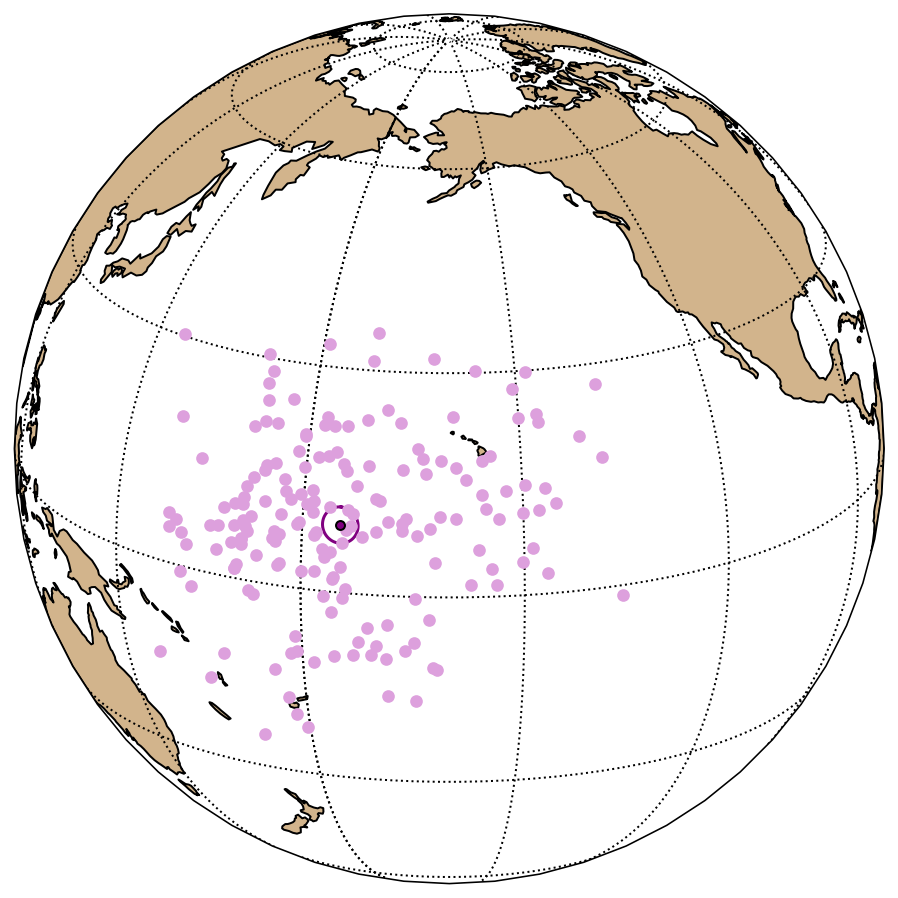

In [28]:
hdt_axis = ipmag.make_orthographic_map(200, 20)
ipmag.plot_vgp(hdt_axis, combined_plong, combined_plat, markersize = 40, color = 'plum', edge = 'none')

combined_pole = ipmag.fisher_mean(combined_plong, combined_plat)
ipmag.plot_pole(hdt_axis, plon=combined_pole['dec'], 
                   plat=combined_pole['inc'], 
                   A95=combined_pole['alpha95'], 
                   color = 'purple')

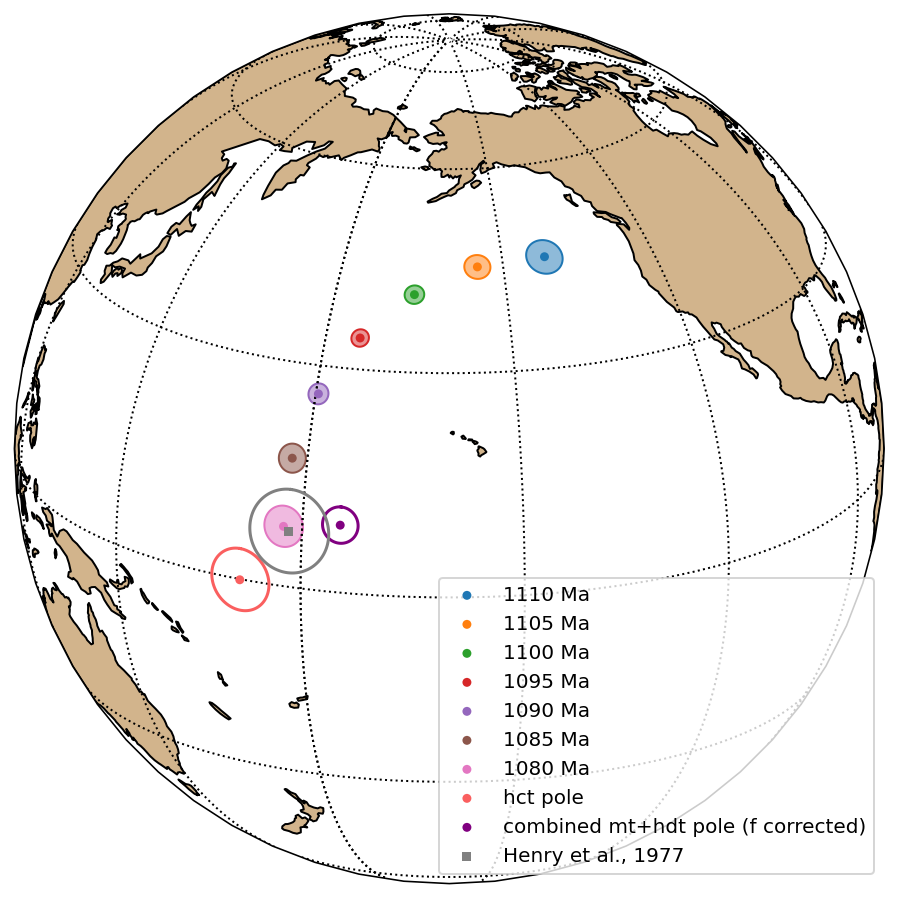

In [29]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

pole_axis = ipmag.make_orthographic_map(200, 20)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(pole_axis,fisher0['dec'],fisher0['inc'],theta0,label='1110 Ma', color = 'C0', edgecolor='none', 
                filled_pole=True, fill_color='C0', fill_alpha=0.5)

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(pole_axis,fisher1['dec'],fisher1['inc'],theta1,label='1105 Ma', color = 'C1', edgecolor='none',
                filled_pole=True, fill_color='C1', fill_alpha=0.5)

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(pole_axis,fisher2['dec'],fisher2['inc'],theta2,label='1100 Ma', color = 'C2', edgecolor='none',
                filled_pole=True, fill_color='C2', fill_alpha=0.5)

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(pole_axis,fisher3['dec'],fisher3['inc'],theta3,label='1095 Ma', color = 'C3', edgecolor='none',
                filled_pole=True, fill_color='C3', fill_alpha=0.5)

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(pole_axis,fisher4['dec'],fisher4['inc'],theta4,label='1090 Ma', color = 'C4', edgecolor='none',
                filled_pole=True, fill_color='C4', fill_alpha=0.5)

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(pole_axis,fisher5['dec'],fisher5['inc'],theta5,label='1085 Ma', color = 'C5', edgecolor='none',
                filled_pole=True, fill_color='C5', fill_alpha=0.5)

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(pole_axis,fisher6['dec'],fisher6['inc'],theta6,label='1080 Ma', color = 'C6', edgecolor='none',
                filled_pole=True, fill_color='C6', fill_alpha=0.5)

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_lt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_lt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_lt['dir_alpha95'].iloc[0], 
#                    color = 'darkgreen', edgecolor = 'none', label = 'lt pole')

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_mt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_mt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_mt['dir_alpha95'].iloc[0], 
#                    color = 'darkorange', edgecolor = 'none', label = 'mt pole')

ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hct['vgp_lon'].iloc[0], 
                   plat=Nonesuch_demag_site_hct['vgp_lat'].iloc[0], 
                   A95=Nonesuch_demag_site_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark, edgecolor = 'none', label = 'hct pole')

# ipmag.plot_pole(pole_axis, plon=Nonesuch_demag_site_hdt['vgp_lon'].iloc[0], 
#                    plat=Nonesuch_demag_site_hdt['vgp_lat'].iloc[0], 
#                    A95=Nonesuch_demag_site_hdt['dir_alpha95'].iloc[0], 
#                    color = 'purple', edgecolor = 'none', label = 'hdt pole')

ipmag.plot_pole(pole_axis, plon=combined_pole['dec'], 
                   plat=combined_pole['inc'], 
                   A95=combined_pole['alpha95'], 
                   color = 'purple', edgecolor = 'none', label = 'combined mt+hdt pole (f corrected)')

ipmag.plot_pole(pole_axis, 178.1, 7.6, 5.6, color = 'grey', edgecolor = 'none', marker = 's', label = 'Henry et al., 1977')
plt.legend()
plt.show()

In [34]:
Nonesuch_measurements_all = pd.read_csv('../Data/Thermal_PF18/measurements.txt', sep='\t', skiprows=1)
Nonesuch_measurements = Nonesuch_measurements_all.loc[Nonesuch_measurements_all.quality == 'g']

Nonesuch_measurements_75 = Nonesuch_measurements[Nonesuch_measurements.specimen == 'PF18-75a']
Nonesuch_measurements_75.reset_index(inplace=True)

Nonesuch_measurements_76 = Nonesuch_measurements[Nonesuch_measurements.specimen == 'PF18-76a']
Nonesuch_measurements_76.reset_index(inplace=True)

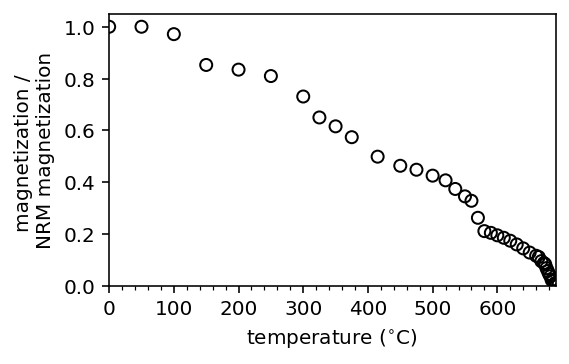

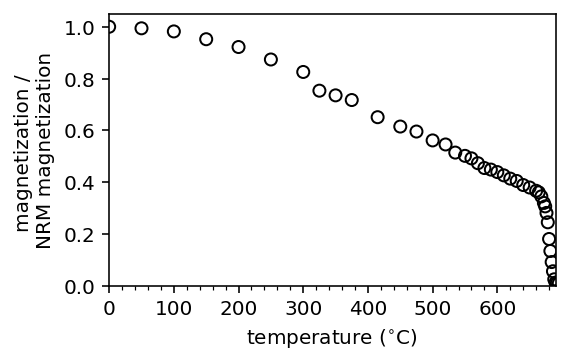

In [35]:
plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_76.treat_temp-273,
            Nonesuch_measurements_76.magn_moment/Nonesuch_measurements_76.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_76.pdf')

plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_75.treat_temp-273,
            Nonesuch_measurements_75.magn_moment/Nonesuch_measurements_75.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_75.pdf')

# plt.ylabel('magnetization / \nNRM magnetization')
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.subplot(1,3,2)
# plt.scatter(Nonesuch_measurements_Nonesuch33.treat_temp-273,
#             Nonesuch_measurements_Nonesuch33.magn_moment/Nonesuch_measurements_Nonesuch33.magn_moment[0],
#             facecolors='none', edgecolors='k')
# plt.xlim(0,690)
# plt.ylim(0,1.1)
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.gca().set_yticklabels([])
# plt.subplot(1,3,3)
# plt.scatter(Nonesuch_measurements_Nonesuch41.treat_temp-273,
#             Nonesuch_measurements_Nonesuch41.magn_moment/Nonesuch_measurements_Nonesuch41.magn_moment[0],
#             facecolors='none', edgecolors='k')
# plt.xlim(0,690)
# plt.ylim(0,1.1)
# plt.xlabel('temperature ($^{\circ}$C)')
# plt.gca().set_yticklabels([])
# plt.tight_layout()
# plt.savefig('./code_output/demag.svg')
plt.show()

## Henry et al. (1977) Nonesuch data and associated fold tests

In [13]:
ipmag.download_magic(infile='../Data/Henry1977/magic_contribution_16450.txt',dir_path='../Data/Henry1977/',data_model=2.5)

working on:  'contribution\r'
1  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/contribution.txt
  data put in  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/contribution.txt
working on:  'sites\r'
31  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/sites.txt
  data put in  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/sites.txt
working on:  'samples\r'
121  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/samples.txt
  data put in  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/samples.txt
working on:  'specimens\r'
313  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/specimens.txt
  data put in  /Users/penokean/0000_GitHub/Nonesuch_Formation/Data/Henry1977/specimens.txt


True

In [14]:
Henry_sites = pd.read_csv('../Data/Henry1977/sites.txt',sep='\t',header=1)
Henry_sites_Nonesuch = Henry_sites[Henry_sites['formation']=='Nonesuch']
Henry_specimens = pd.read_csv('../Data/Henry1977/specimens.txt',sep='\t',header=1)
Henry_specimens_Nonesuch = Henry_specimens[Henry_specimens['description']=='Nonesuch shale']
Henry_specimens_Nonesuch_PRIM = Henry_specimens_Nonesuch[Henry_specimens_Nonesuch['dir_comp']=='PRIM']
Henry_specimens_Nonesuch_SEC = Henry_specimens_Nonesuch[Henry_specimens_Nonesuch['dir_comp']=='SEC']

In [15]:
Henry_sites_Nonesuch

,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_tilt_correction,formation,geologic_classes,geologic_types,lat,lithologies,location,lon,method_codes,samples,site,specimens
0,1080,1070.0,Ma,7.4,PRIM,279.3,14.0,275.0,3,100,Nonesuch,Sedimentary,Sediment Layer,46.818,Shale,Big Iron River,-89.570,LP-DIR-T,NS4:NS5:NS6,2,NS4:NS5:NS6
5,1080,1070.0,Ma,NaN,PRIM,266.6,-7.3,NaN,1,100,Nonesuch,Sedimentary,Sediment Layer,46.820,Shale,Big Iron River,-89.572,LP-DIR-T,NS21:NS23:NS24:NS25,7,NS21:NS23:NS24:NS25
6,1080,1070.0,Ma,25.7,PRIM,276.0,11.7,10.0,5,100,Nonesuch,Sedimentary,Sediment Layer,46.820,Shale,Big Iron River,-89.572,LP-DIR-T,NS26:NS27:NS28:NS29,8,NS26:NS27:NS28:NS29
7,1080,1070.0,Ma,35.3,PRIM,288.0,-3.6,13.0,3,100,Nonesuch,Sedimentary,Sediment Layer,46.820,Shale,Big Iron River,-89.572,LP-DIR-T,NS30:NS31:NS32:NS33,9,NS30:NS31:NS32:NS33
8,1080,1070.0,Ma,NaN,PRIM,261.9,21.7,NaN,1,100,Nonesuch,Sedimentary,Sediment Layer,46.821,Shale,Big Iron River,-89.573,LP-DIR-T,NS35,10,NS35
9,1080,1070.0,Ma,10.6,PRIM,280.0,-0.6,136.0,3,100,Nonesuch,Sedimentary,Sediment Layer,46.821,Shale,Big Iron River,-89.573,LP-DIR-T,NS37:NS38,11,NS37:NS38
23,1080,1070.0,Ma,NaN,PRIM,265.2,9.0,NaN,1,100,Nonesuch,Sedimentary,Sediment Layer,46.666,Shale,Presque Isle River,-89.939,LP-DIR-T,30B,30,30B
24,1080,1070.0,Ma,NaN,PRIM,281.6,-2.2,NaN,1,100,Nonesuch,Sedimentary,Sediment Layer,46.666,Shale,Presque Isle River,-89.941,LP-DIR-T,31C,31,31C
25,1080,1070.0,Ma,NaN,PRIM,275.6,9.3,NaN,4,100,Nonesuch,Sedimentary,Sediment Layer,46.667,Shale,Presque Isle River,-89.940,LP-DIR-T,32A:32B:32C:32D,32,32A:32B:32C:32D
26,1080,1070.0,Ma,5.3,PRIM,289.4,25.6,301.0,4,100,Nonesuch,Sedimentary,Sediment Layer,46.668,Shale,Presque Isle River,-89.940,LP-DIR-T,33A:33B:33C:33D,33,33A:33B:33C:33D


In [16]:
Henry_specimens_Nonesuch_SEC

,citations,description,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_nrm_origin,dir_polarity,dir_tilt_correction,int_corr,method_codes,result_quality,sample,specimen
267,Henry1977,Nonesuch shale,SEC,291.8,-3.9,2,p,n,0,u,DE-BFL:LP-DIR-T,g,3c,3c
268,Henry1977,Nonesuch shale,SEC,290.6,-5.0,2,p,n,100,u,DE-BFL:LP-DIR-T,g,3c,3c
271,Henry1977,Nonesuch shale,SEC,290.4,-16.1,2,p,n,0,u,DE-BFL:LP-DIR-T,g,3d,3d
272,Henry1977,Nonesuch shale,SEC,285.8,-16.4,2,p,n,100,u,DE-BFL:LP-DIR-T,g,3d,3d


In [84]:
Henry_specimens_Nonesuch_PRIM_is = Henry_specimens_Nonesuch_PRIM[Henry_specimens_Nonesuch_PRIM['dir_tilt_correction']==0]
Henry_specimens_Nonesuch_PRIM_tc = Henry_specimens_Nonesuch_PRIM[Henry_specimens_Nonesuch_PRIM['dir_tilt_correction']==100]
Henry_specimens_Nonesuch_SEC_is = Henry_specimens_Nonesuch_SEC[Henry_specimens_Nonesuch_SEC['dir_tilt_correction']==0]
Henry_specimens_Nonesuch_SEC_tc = Henry_specimens_Nonesuch_SEC[Henry_specimens_Nonesuch_SEC['dir_tilt_correction']==100]
Nonesuch_demag_specimen_hdt_is = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hdt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]
Nonesuch_demag_specimen_mt_is = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'mt') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]
Nonesuch_demag_specimen_hct_is = Nonesuch_demag_specimen[(Nonesuch_demag_specimen['dir_comp'] == 'hct') & (Nonesuch_demag_specimen['dir_tilt_correction'] == 0)]

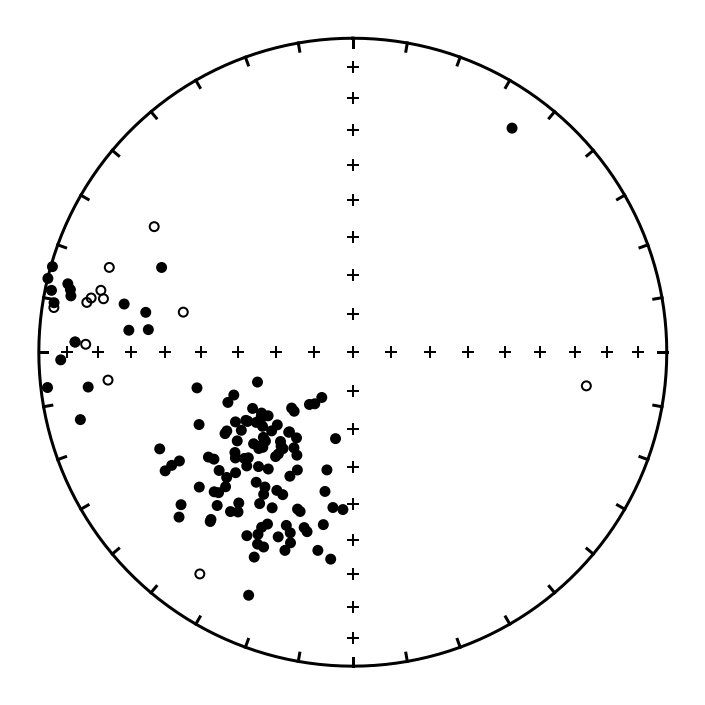

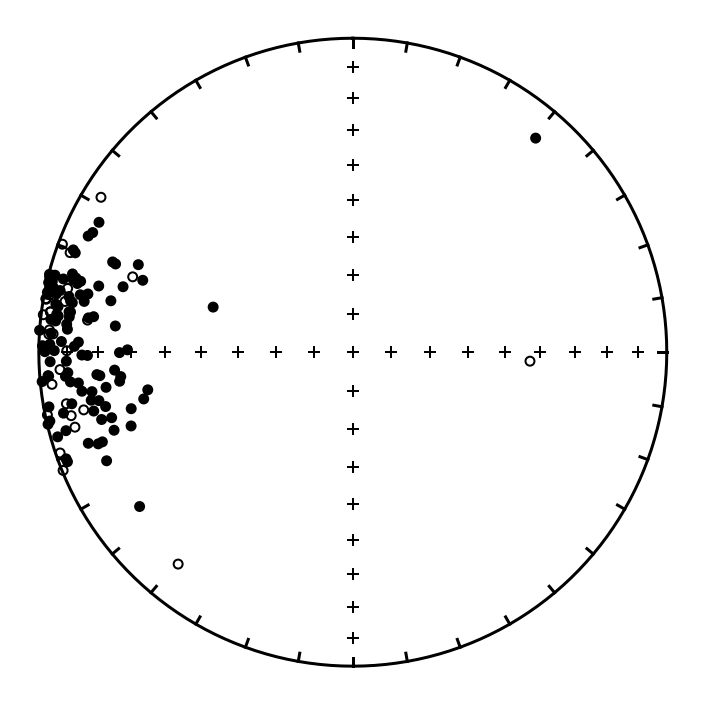

In [85]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_PRIM_is['dir_dec'].tolist(),Henry_specimens_Nonesuch_PRIM_is['dir_inc'].tolist())
ipmag.plot_di(Nonesuch_demag_specimen_hdt_is['dir_dec'].tolist(),Nonesuch_demag_specimen_hdt_is['dir_inc'].tolist())

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_PRIM_tc['dir_dec'].tolist(),Henry_specimens_Nonesuch_PRIM_tc['dir_inc'].tolist())
ipmag.plot_di(Nonesuch_demag_specimen_hdt['dir_dec'].tolist(),Nonesuch_demag_specimen_hdt['dir_inc'].tolist())

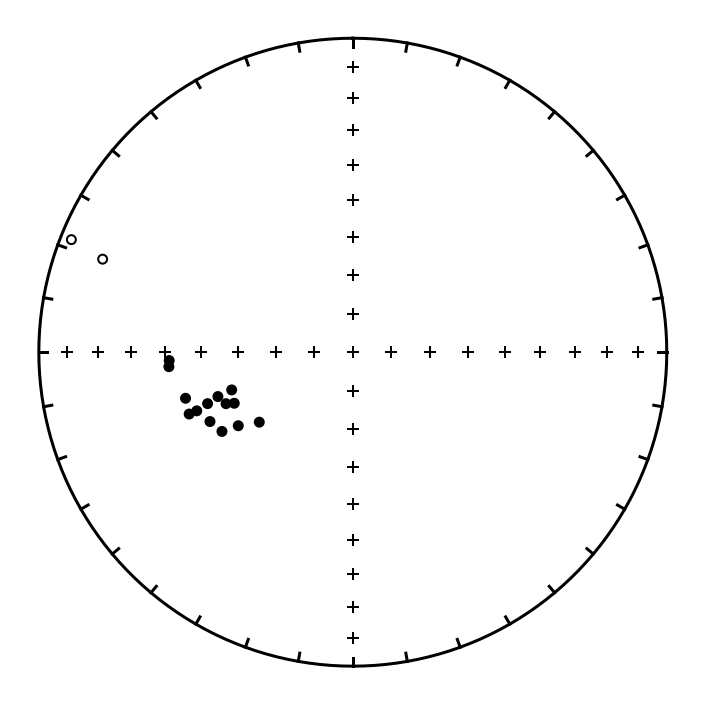

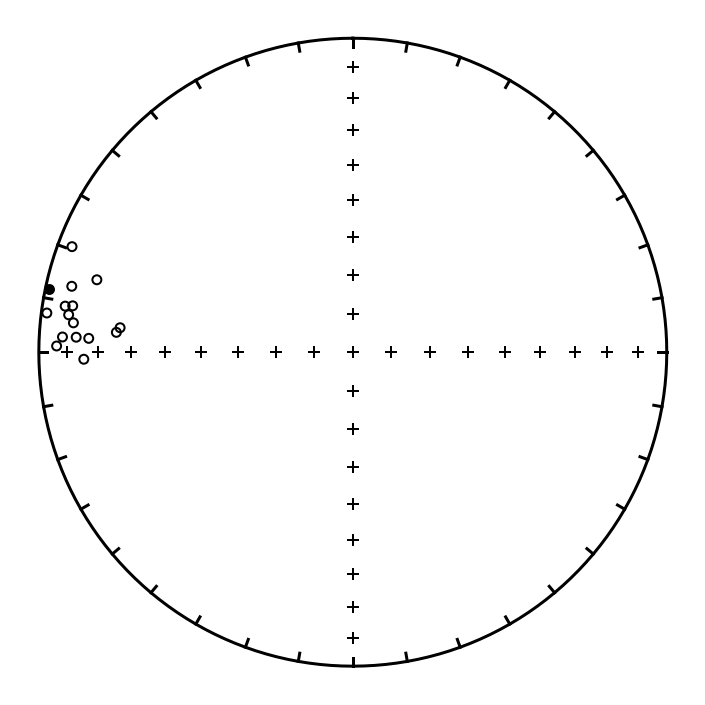

In [19]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_SEC_is['dir_dec'].tolist(),Henry_specimens_Nonesuch_SEC_is['dir_inc'].tolist())
ipmag.plot_di(Nonesuch_demag_specimen_hct_is['dir_dec'].tolist(),Nonesuch_demag_specimen_hct_is['dir_inc'].tolist())

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_SEC_tc['dir_dec'].tolist(),Henry_specimens_Nonesuch_SEC_tc['dir_inc'].tolist())
ipmag.plot_di(Nonesuch_demag_specimen_hct['dir_dec'].tolist(),Nonesuch_demag_specimen_hct['dir_inc'].tolist())

In [48]:
Henry_specimens_Nonesuch_PRIM_is.head()

,citations,description,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_nrm_origin,dir_polarity,dir_tilt_correction,int_corr,method_codes,result_quality,sample,specimen
0,Henry1977,Nonesuch shale,PRIM,272.1,12.5,1,p,n,0,u,DE-BFL:LP-DIR-T,g,35a,35a
2,Henry1977,Nonesuch shale,PRIM,271.7,-16.0,1,p,n,0,u,DE-BFL:LP-DIR-T,g,37a,37a
4,Henry1977,Nonesuch shale,PRIM,281.7,-16.0,1,p,n,0,u,DE-BFL:LP-DIR-T,g,38a,38a
6,Henry1977,Nonesuch shale,PRIM,283.8,-18.5,1,p,n,0,u,DE-BFL:LP-DIR-T,g,38b,38b
138,Henry1977,Nonesuch shale,PRIM,278.5,-4.2,1,p,n,0,u,DE-BFL:LP-DIR-T,g,NS4,NS4


In [75]:
Henry_drm_decs = Henry_specimens_Nonesuch_PRIM_is['dir_dec'].tolist()
Henry_drm_incs = Henry_specimens_Nonesuch_PRIM_is['dir_inc'].tolist()
Henry_drm_dip_directions = []
Henry_drm_dips = []

for n in Henry_specimens_Nonesuch_PRIM_is['specimen']:

    if n in ['NS4','NS5','NS6']:
        dip_direction = 44 + 90
        dip = 17

    if n in ['NS21','NS23','NS24','NS25']:
        dip_direction = 32 + 90
        dip = 19

    if n in [ 'NS26','NS27','NS28','NS29','NS29']:
        dip_direction = 25 + 90
        dip = 19.7

    if n in ['NS30','NS31','NS32','NS33']:
        dip_direction = 41 + 90
        dip = 18.7

    if n in ['30B']:
        dip_direction = (285 + 90)%360
        dip = 18.7

    if n in ['31C']:
        dip_direction = (271 + 90)%360
        dip = 20.3

    if n in [ '32A']:
        dip_direction = (264 + 90)%360
        dip = 18.5

    if n in [ '33A','33B','33C','33D']:
        dip_direction = (271 + 90)%360
        dip = 18.5
        
    if n in ['35a']:
        dip_direction = (226 + 90)%360
        dip = 8.0
        
    if n in ['37a', '38a','38b']:
        dip_direction = (26 + 90)%360
        dip = 19.3
        
    if n in ['33A','33B','33C','33D']:
        dip_direction = (271 + 90)%360
        dip = 20.2
        
    if n in ['3a','3b','3c','3d']:
        dip_direction = (287 + 90)%360
        dip = 15.5       
       
    Henry_drm_dip_directions.append(dip_direction)
    Henry_drm_dips.append(dip)   
    
Henry_crm_decs = Henry_specimens_Nonesuch_SEC_is['dir_dec'].tolist()
Henry_crm_incs = Henry_specimens_Nonesuch_SEC_is['dir_inc'].tolist()
Henry_crm_dip_directions = []
Henry_crm_dips = []

for n in Henry_specimens_Nonesuch_SEC_is['specimen']:
        
    if n in ['3a','3b','3c','3d']:
        dip_direction = (287 + 90)%360
        dip = 15.5       
       
    Henry_crm_dip_directions.append(dip_direction)
    Henry_crm_dips.append(dip)   

In [88]:
Nonesuch_crm_decs = Nonesuch_demag_specimen_hct_is['dir_dec'].tolist()
Nonesuch_crm_incs = Nonesuch_demag_specimen_hct_is['dir_inc'].tolist()
Nonesuch_crm_dip_directions = []
Nonesuch_crm_dips = []

for n in Nonesuch_demag_specimen_hct_is['sample']:
    bed_dip_direction = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip_direction'].values[0]
    bed_dip = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip'].values[0]
    Nonesuch_crm_dip_directions.append(bed_dip_direction)
    Nonesuch_crm_dips.append(bed_dip)
    
Nonesuch_hdt_decs = Nonesuch_demag_specimen_hdt_is['dir_dec'].tolist()
Nonesuch_hdt_incs = Nonesuch_demag_specimen_hdt_is['dir_inc'].tolist()
Nonesuch_hdt_dip_directions = []
Nonesuch_hdt_dips = []

for n in Nonesuch_demag_specimen_hdt_is['sample']:
    bed_dip_direction = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip_direction'].values[0]
    bed_dip = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip'].values[0]
    Nonesuch_hdt_dip_directions.append(bed_dip_direction)
    Nonesuch_hdt_dips.append(bed_dip)
    
# Nonesuch_mt_decs = Nonesuch_demag_specimen_mt_is['dir_dec'].tolist()
# Nonesuch_mt_incs = Nonesuch_demag_specimen_mt_is['dir_inc'].tolist()
# Nonesuch_mt_dip_directions = []
# Nonesuch_mt_dips = []

# for n in Nonesuch_demag_specimen_mt_is['sample']:
#     bed_dip_direction = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip_direction'].values[0]
#     bed_dip = Nonesuch_demag_sample.loc[Nonesuch_demag_sample['sample'] == n, 'bed_dip'].values[0]
#     Nonesuch_mt_dip_directions.append(bed_dip_direction)
#     Nonesuch_mt_dips.append(bed_dip)

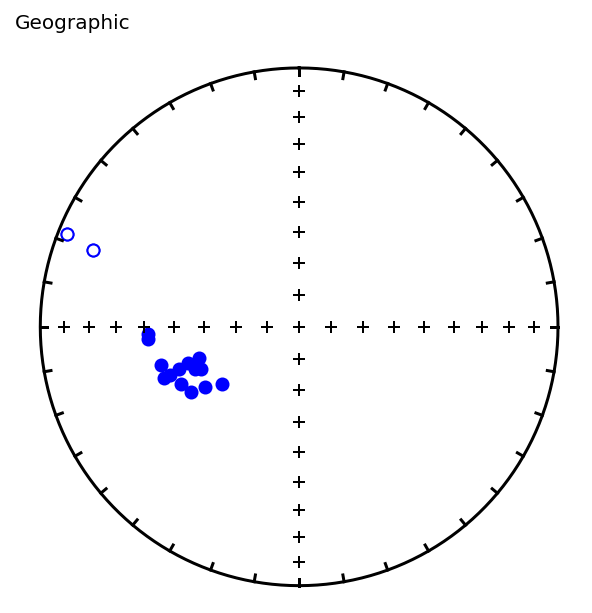

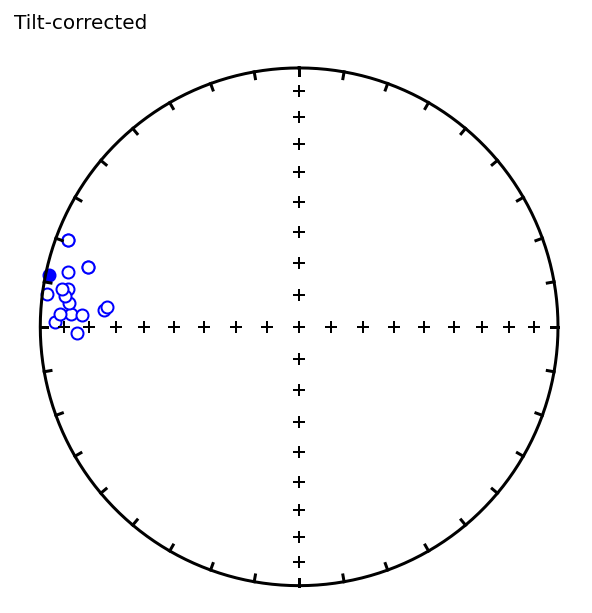

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
87 - 109 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


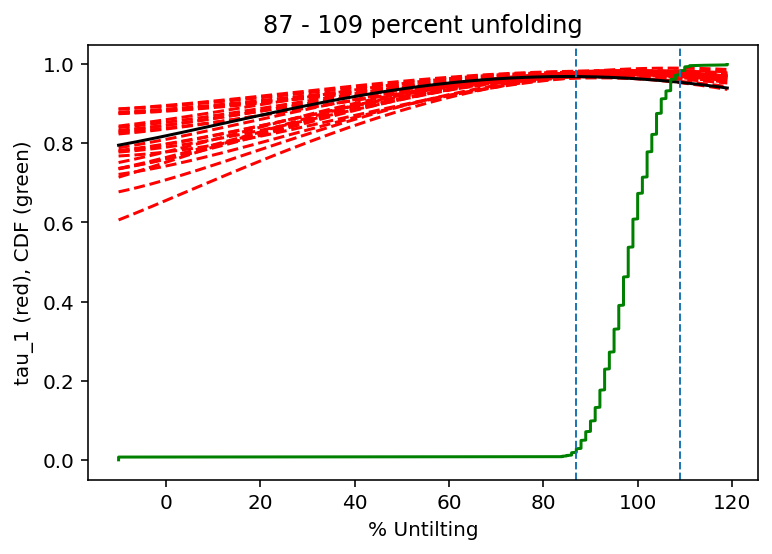

In [79]:
Nonesuch_CRM_diddd = ipmag.make_diddd_array(Henry_crm_decs+Henry_crm_decs+Nonesuch_crm_decs,
                                            Henry_crm_incs+Henry_crm_incs+Nonesuch_crm_incs,
                                            Henry_crm_dip_directions+Henry_crm_dip_directions+Nonesuch_crm_dip_directions,
                                            Henry_crm_dips+Henry_crm_dips+Nonesuch_crm_dips)
ipmag.bootstrap_fold_test(Nonesuch_CRM_diddd)

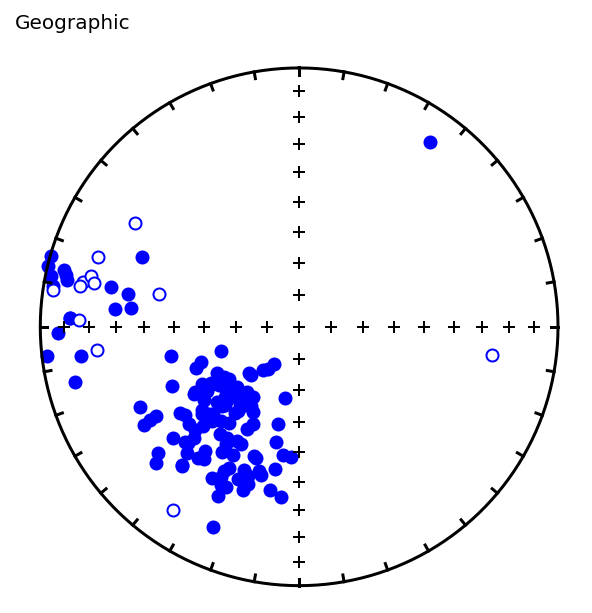

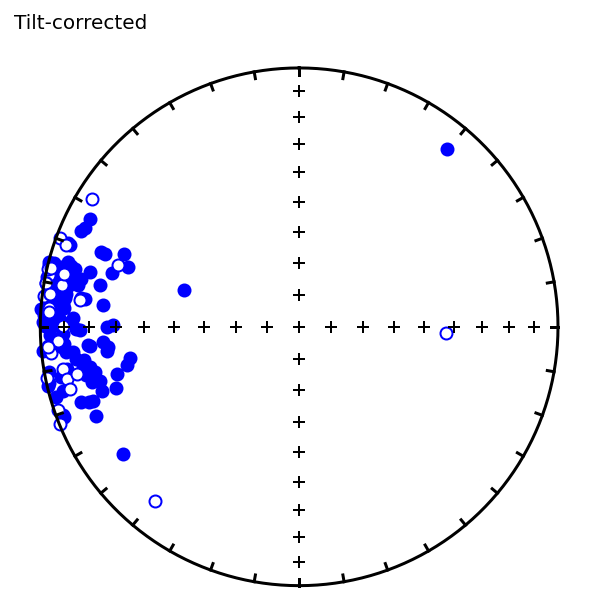

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
88 - 106 percent unfolding
range of all bootstrap samples: 
83  -  111 percent unfolding


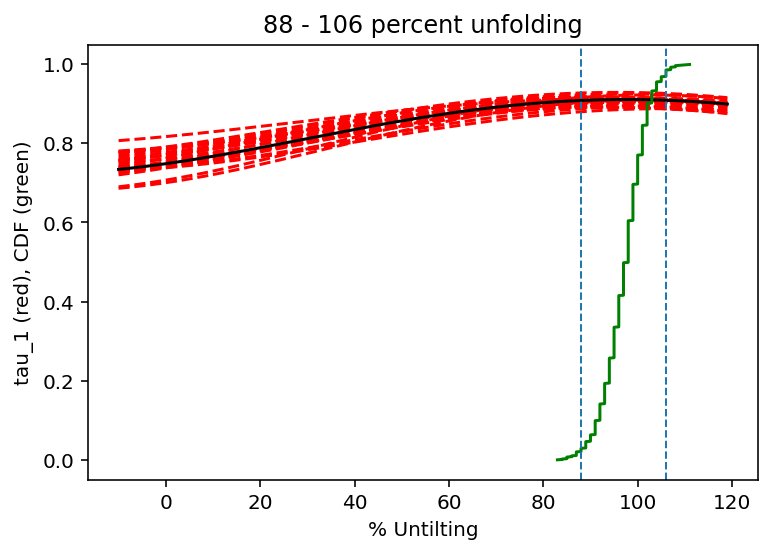

In [91]:
Nonesuch_DRM_diddd = ipmag.make_diddd_array(Henry_drm_decs+Nonesuch_hdt_decs,
                                            Henry_drm_incs+Nonesuch_hdt_incs,
                                            Henry_drm_dip_directions+Nonesuch_hdt_dip_directions,
                                            Henry_drm_dips+Nonesuch_hdt_dips)
ipmag.bootstrap_fold_test(Nonesuch_DRM_diddd)